EJERICICIO 2

Utilice el metodo de interpolaci´on de Lagrange para encontrar un polinomio que se ajuste a la
funcion


In [43]:
#Importacion de librerias
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from sympy.plotting import plot

#Funcion para la interpolacion de lagrange

def lagrange(xi, yi):
    n  = len(xi)
    x  = sym.Symbol('x')
    ui = sym.ones(n, 1) #Arreglo de polinomios 
    b = sym.zeros(n, 1) # Funcion a aproximar
    
    for i in range(n):
        b[i] = yi[i]
        for j in range(n):
            if i!=j:
                ui[i] *= (x-xi[j])/(xi[i] - xi[j]) #Cuando i es diferente de j debe dar cero 
    
    polinomio = 0
    for i in range(n):
        polinomio += b[i]*ui[i,0]   
        
    return ui, polinomio

La funcion aproximada es: 0.5*x*(0.25 - 0.75*x)*(0.4 - 0.6*x)*(0.5 - 0.5*x)*(-3.0*x - 2.0)*(-1.5*x - 0.5) - 0.625000000000003*x*(0.333333333333333 - 1.0*x)*(0.5 - 0.75*x)*(0.6 - 0.6*x)*(-3.0*x - 1.0)*(3.0*x + 3.0) - 1.75*x*(0.5 - 1.5*x)*(0.666666666666667 - 1.0*x)*(0.75 - 0.75*x)*(1.5*x + 1.5)*(3.0*x + 2.0) + 2.75*x*(1.5 - 1.5*x)*(2.0 - 3.0*x)*(0.75*x + 0.75)*(1.0*x + 0.666666666666667)*(1.5*x + 0.5) + 1.625*x*(3.0 - 3.0*x)*(0.6*x + 0.6)*(0.75*x + 0.5)*(1.0*x + 0.333333333333333)*(3.0*x - 1.0) + 0.5*x*(0.5*x + 0.5)*(0.6*x + 0.4)*(0.75*x + 0.25)*(1.5*x - 0.5)*(3.0*x - 2.0)


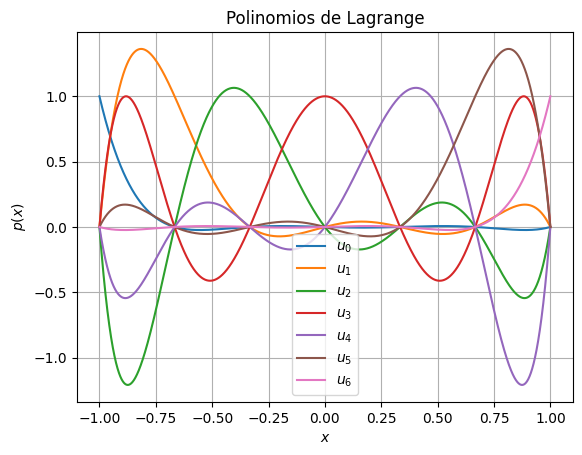

In [30]:
x = sym.Symbol('x')    
n = 7 # Polinomio de orden n requiere n+1 puntos (poli 5 pun 6)
funcion = ((sym.sin(np.pi*x))**2)+(x/2) #Funcion a aproximar
lim = [-1,1]

Xi = np.linspace(lim[0],lim[1], n) # Intervalo de interpolacion dividido en n+1 puntos (6)
Fi = sym.lambdify(x, funcion)(Xi)

ui, fl = lagrange(Xi, Fi)
print(f"La funcion aproximada es: {fl}")

# GRAFICA DE POLINOMIOS INTERPOLANTES
x2  = np.linspace(lim[0],lim[1], 10000)
y2 = sym.lambdify(x, funcion)(x2) 
plt.figure()
for i,u in enumerate(ui):
    px = sym.lambdify(x, u)(x2)
    plt.plot(x2,px, label=f"$u_{i}$")
plt.grid()
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.title(f"Polinomios de Lagrange")
plt.legend()

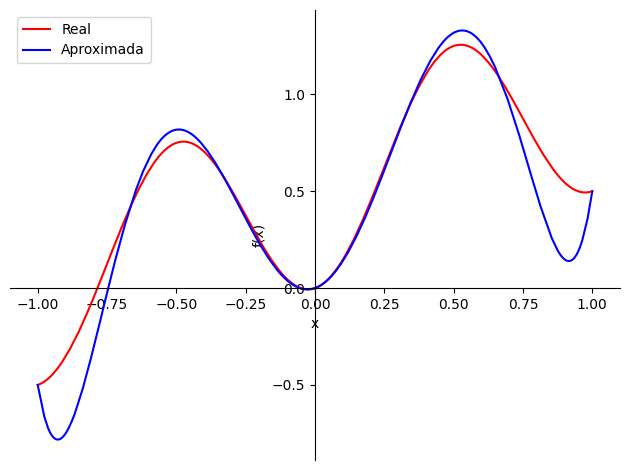

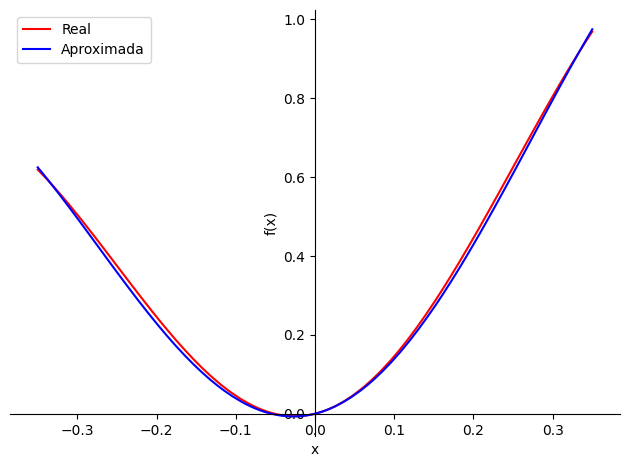

'grafico_l = plot(fl, (x, lim[0], lim[1]), show=False, legend= False)\ngrafico_l.show()\n\nplt.figure()\nplt.plot(x2,y2, zorder=0, label="$f(x)$")\nplt.plot(x2,yl, zorder=1, label="Polinomio Lagrange")\nplt.grid()\nplt.xlabel("$x$")\nplt.ylabel("$f(x)$")\nplt.legend()\n\nplt.scatter(Xi,Fi, c=\'red\')'

In [41]:
yl= sym.lambdify(x, fl)(x2)
grafico = plot(funcion, fl, (x, lim[0], lim[1]), legend= True,
            xlabel='x', ylabel='f(x)', show=False) #Grafico en los limites dados
grafico[0].line_color = 'r' 
grafico[0].label = "Real"
grafico[1].line_color = 'b' 
grafico[1].label = "Aproximada"
grafico.show()

lim_b = [-0.35, 0.35] #Rango de mejor aproximacion

grafico2 = plot(funcion, fl, (x, lim_b[0], lim_b[1]), legend= True,
            xlabel='x', ylabel='f(x)', show=False) #Grafico en los limites de mejor aproximacion 
grafico2[0].line_color = 'r' 
grafico2[0].label = "Real"
grafico2[1].line_color = 'b' 
grafico2[1].label = "Aproximada"
grafico2.show()

'''grafico_l = plot(fl, (x, lim[0], lim[1]), show=False, legend= False)
grafico_l.show()

plt.figure()
plt.plot(x2,y2, zorder=0, label="$f(x)$")
plt.plot(x2,yl, zorder=1, label="Polinomio Lagrange")
plt.grid()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend()

plt.scatter(Xi,Fi, c='red')'''